<a href="https://colab.research.google.com/github/benniella/Ml-learning/blob/main/Nig_VS_Alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 790.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
#importing the yolo libraries
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# uploading the dataset zip file
from google.colab import files
uploaded = files.upload()


Saving football-players-detection.v2i.yolov8.zip to football-players-detection.v2i.yolov8.zip


In [ ]:
# extract the zip file
import zipfile

zip_path = "/content/football-players-detection.v2i.yolov8.zip"
extract_path = "/content/football-players-data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
# Train Yolov8 on my dataset
# Train model
model = YOLO('yolov8n.pt')

results = model.train(
    data=f"{extract_path}/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16
)


Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-players-data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 

train: Scanning /content/football-players-data/train/labels... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<00:00, 1711.23it/s]

train: New cache created: /content/football-players-data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2231.7±630.1 MB/s, size: 61.9 KB)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /content/football-players-data/valid/labels... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<00:00, 2423.11it/s]

val: New cache created: /content/football-players-data/valid/labels.cache



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.851      3.415     0.9674        271        640: 100%|██████████| 19/19 [03:01<00:00,  9.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.47s/it]

                   all         49       1174    0.00938     0.0659     0.0456     0.0135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/20         0G       1.71      1.573     0.9074        279        640: 100%|██████████| 19/19 [02:55<00:00,  9.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.27s/it]

                   all         49       1174     0.0299      0.134      0.102     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.548      1.314     0.8969        266        640: 100%|██████████| 19/19 [02:54<00:00,  9.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.19s/it]

                   all         49       1174     0.0379      0.314      0.189      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G      1.527      1.228      0.883        453        640: 100%|██████████| 19/19 [02:52<00:00,  9.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.24s/it]

                   all         49       1174      0.707      0.119      0.196     0.0959

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G      1.491       1.17     0.8808        263        640: 100%|██████████| 19/19 [02:52<00:00,  9.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]

                   all         49       1174      0.963      0.202      0.259      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.479       1.13     0.8741        332        640: 100%|██████████| 19/19 [02:58<00:00,  9.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.30s/it]

                   all         49       1174      0.904      0.236      0.283       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/20         0G      1.452      1.092     0.8723        311        640: 100%|██████████| 19/19 [02:51<00:00,  9.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.24s/it]

                   all         49       1174      0.789      0.259      0.272       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/20         0G      1.396      1.066     0.8587        321        640: 100%|██████████| 19/19 [02:51<00:00,  9.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.17s/it]

                   all         49       1174      0.877      0.258      0.298      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G       1.36      1.028      0.858        213        640: 100%|██████████| 19/19 [02:54<00:00,  9.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.67s/it]

                   all         49       1174      0.876      0.275      0.327      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/20         0G      1.332     0.9826     0.8571        379        640: 100%|██████████| 19/19 [02:54<00:00,  9.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.26s/it]

                   all         49       1174      0.767      0.317      0.354      0.212
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      11/20         0G      1.272     0.9576     0.8629        239        640: 100%|██████████| 19/19 [02:45<00:00,  8.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.23s/it]

                   all         49       1174      0.705       0.34      0.377      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/20         0G      1.227     0.9089     0.8626        233        640: 100%|██████████| 19/19 [02:45<00:00,  8.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.57s/it]

                   all         49       1174      0.789      0.331      0.393      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G      1.249     0.9084     0.8551        226        640: 100%|██████████| 19/19 [02:45<00:00,  8.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.38s/it]

                   all         49       1174      0.695      0.365      0.408      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.221     0.8622      0.856        231        640: 100%|██████████| 19/19 [02:48<00:00,  8.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.88s/it]

                   all         49       1174      0.721      0.391      0.428       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G      1.209     0.8534     0.8489        234        640: 100%|██████████| 19/19 [02:52<00:00,  9.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.93s/it]

                   all         49       1174      0.758      0.432      0.485      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/20         0G      1.173     0.8139     0.8518        233        640: 100%|██████████| 19/19 [02:46<00:00,  8.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.36s/it]

                   all         49       1174      0.739      0.453      0.496      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G      1.151     0.8026     0.8479        240        640: 100%|██████████| 19/19 [02:46<00:00,  8.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.52s/it]

                   all         49       1174      0.752      0.478      0.533       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/20         0G      1.137     0.7816     0.8415        232        640: 100%|██████████| 19/19 [02:46<00:00,  8.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.51s/it]

                   all         49       1174      0.781      0.478      0.546      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G      1.141     0.7688     0.8471        232        640: 100%|██████████| 19/19 [02:47<00:00,  8.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.90s/it]

                   all         49       1174      0.795      0.468      0.569      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G      1.125     0.7544     0.8419        231        640: 100%|██████████| 19/19 [02:51<00:00,  9.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.54s/it]

                   all         49       1174      0.759      0.534      0.585      0.344

20 epochs completed in 1.013 hours.


Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.93s/it]


                   all         49       1174      0.759      0.536      0.585      0.344
                  ball         45         45          1          0     0.0985     0.0335
            goalkeeper         38         39      0.728      0.549      0.643      0.347
                player         49        973      0.766      0.963       0.95      0.622
               referee         49        117      0.543      0.632      0.646      0.373
Speed: 1.8ms preprocess, 181.0ms inference, 0.0ms loss, 11.0ms postprocess per image
Results saved to runs/detect/train


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


from ultralytics import YOLO

# Load your trained weights from Drive
model = YOLO('/content/drive/MyDrive/colab/best_backup.pt')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

# Copy your best weights to Google Drive
shutil.copy(
    '/content/runs/detect/train/weights/best.pt',
    '/content/drive/MyDrive/colab/best_backup.pt'
)


'/content/drive/MyDrive/colab/best_backup.pt'

In [ ]:
# Load trained model
trained_model = YOLO('runs/detect/train/weights/best.pt')

# Test on an image
result = trained_model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)


100%|██████████| 134k/134k [00:00<00:00, 4.10MB/s]


image 1/1 /content/bus.jpg: 640x480 (no detections), 224.5ms
Speed: 12.6ms preprocess, 224.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving vini.png to vini (1).png


In [ ]:
from ultralytics import YOLO

# Load your trained model
trained_model = YOLO('runs/detect/train/weights/best.pt')

# Run prediction
result = trained_model.predict(source='vini.png', save=True)


FileNotFoundError: vini.png does not exist

Saved files: ['vini.jpg']


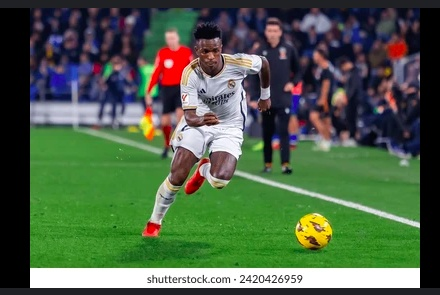

In [ ]:
import os
from IPython.display import Image, display

# Get the prediction folder path
output_dir = result[0].save_dir

# List the files in that directory
print("Saved files:", os.listdir(output_dir))

# Display the first image
display(Image(filename=os.path.join(output_dir, os.listdir(output_dir)[0])))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Check inside your Drive's 'colab' folder
path = "/content/drive/MyDrive/colab"
print("Files in colab folder:", os.listdir(path))



Files in colab folder: [' FRIENDLY.mp4', 'best_backup.pt']


In [ ]:
video_path = '/content/drive/MyDrive/colab/ FRIENDLY.mp4'
print("File found:", os.path.exists(video_path))



File found: True


In [ ]:
!pip install ultralytics opencv-python-headless


In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/train/weights/best.pt')


In [ ]:
import cv2
import os

video_path = '/content/drive/MyDrive/colab/ FRIENDLY.mp4'  # your 2hr video
output_dir = '/content/processed_frames'
os.makedirs(output_dir, exist_ok=True)

# Open the video
cap = cv2.VideoCapture(video_path)
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Process every Nth frame (e.g., 1 every 5 seconds)
    if frame_count % int(frame_rate * 5) == 0:
        frame_path = f"{output_dir}/frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)

        results = model.predict(source=frame_path, save=True, save_txt=True,
                                conf=0.3, project='runs', name='video_preds', exist_ok=True)

        print(f"Processed frame {frame_count}")

    frame_count += 1

cap.release()
print("✅ Done processing selected frames.")


Streaming output truncated to the last 5000 lines.
Processed frame 190200

image 1/1 /content/processed_frames/frame_190500.jpg: 384x640 13 players, 222.9ms
Speed: 5.4ms preprocess, 222.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/video_preds
503 labels saved to runs/video_preds/labels
Processed frame 190500

image 1/1 /content/processed_frames/frame_190800.jpg: 384x640 15 players, 151.2ms
Speed: 4.1ms preprocess, 151.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/video_preds
504 labels saved to runs/video_preds/labels
Processed frame 190800

image 1/1 /content/processed_frames/frame_191100.jpg: 384x640 13 players, 145.6ms
Speed: 3.4ms preprocess, 145.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/video_preds
505 labels saved to runs/video_preds/labels
Processed frame 191100

image 1/1 /content/processed_frames/frame_191400.jpg: 384x640 (no detections), 

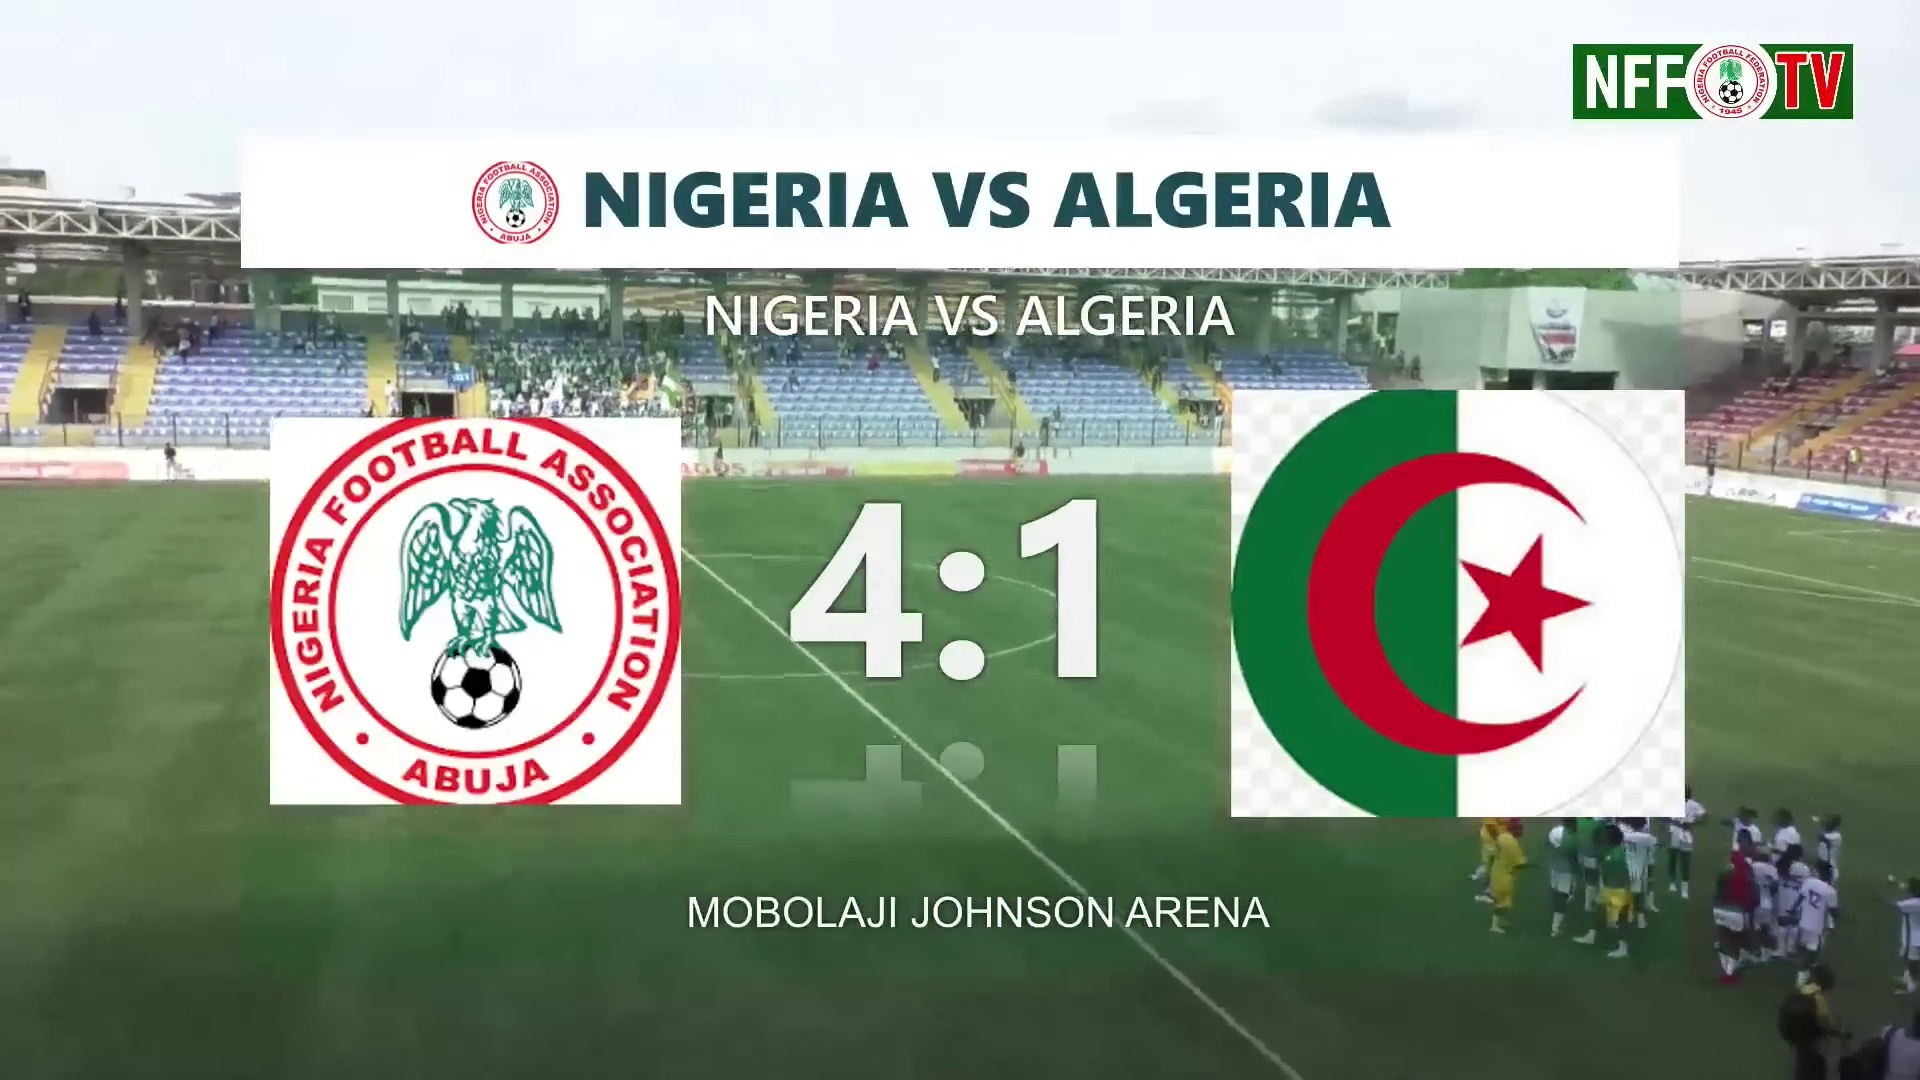

In [ ]:
import IPython.display as display
from PIL import Image

# Pick a frame (e.g., 410100)
frame_path = 'runs/video_preds/frame_440100.jpg'
display.display(Image.open(frame_path))


In [ ]:
import os

label_dir = 'runs/video_preds/labels'
frames_with_labels = os.listdir(label_dir)
print("Detected frames:", frames_with_labels[:5])  # Show first 5


Detected frames: ['frame_204600.txt', 'frame_63600.txt', 'frame_154500.txt', 'frame_429900.txt', 'frame_292800.txt']


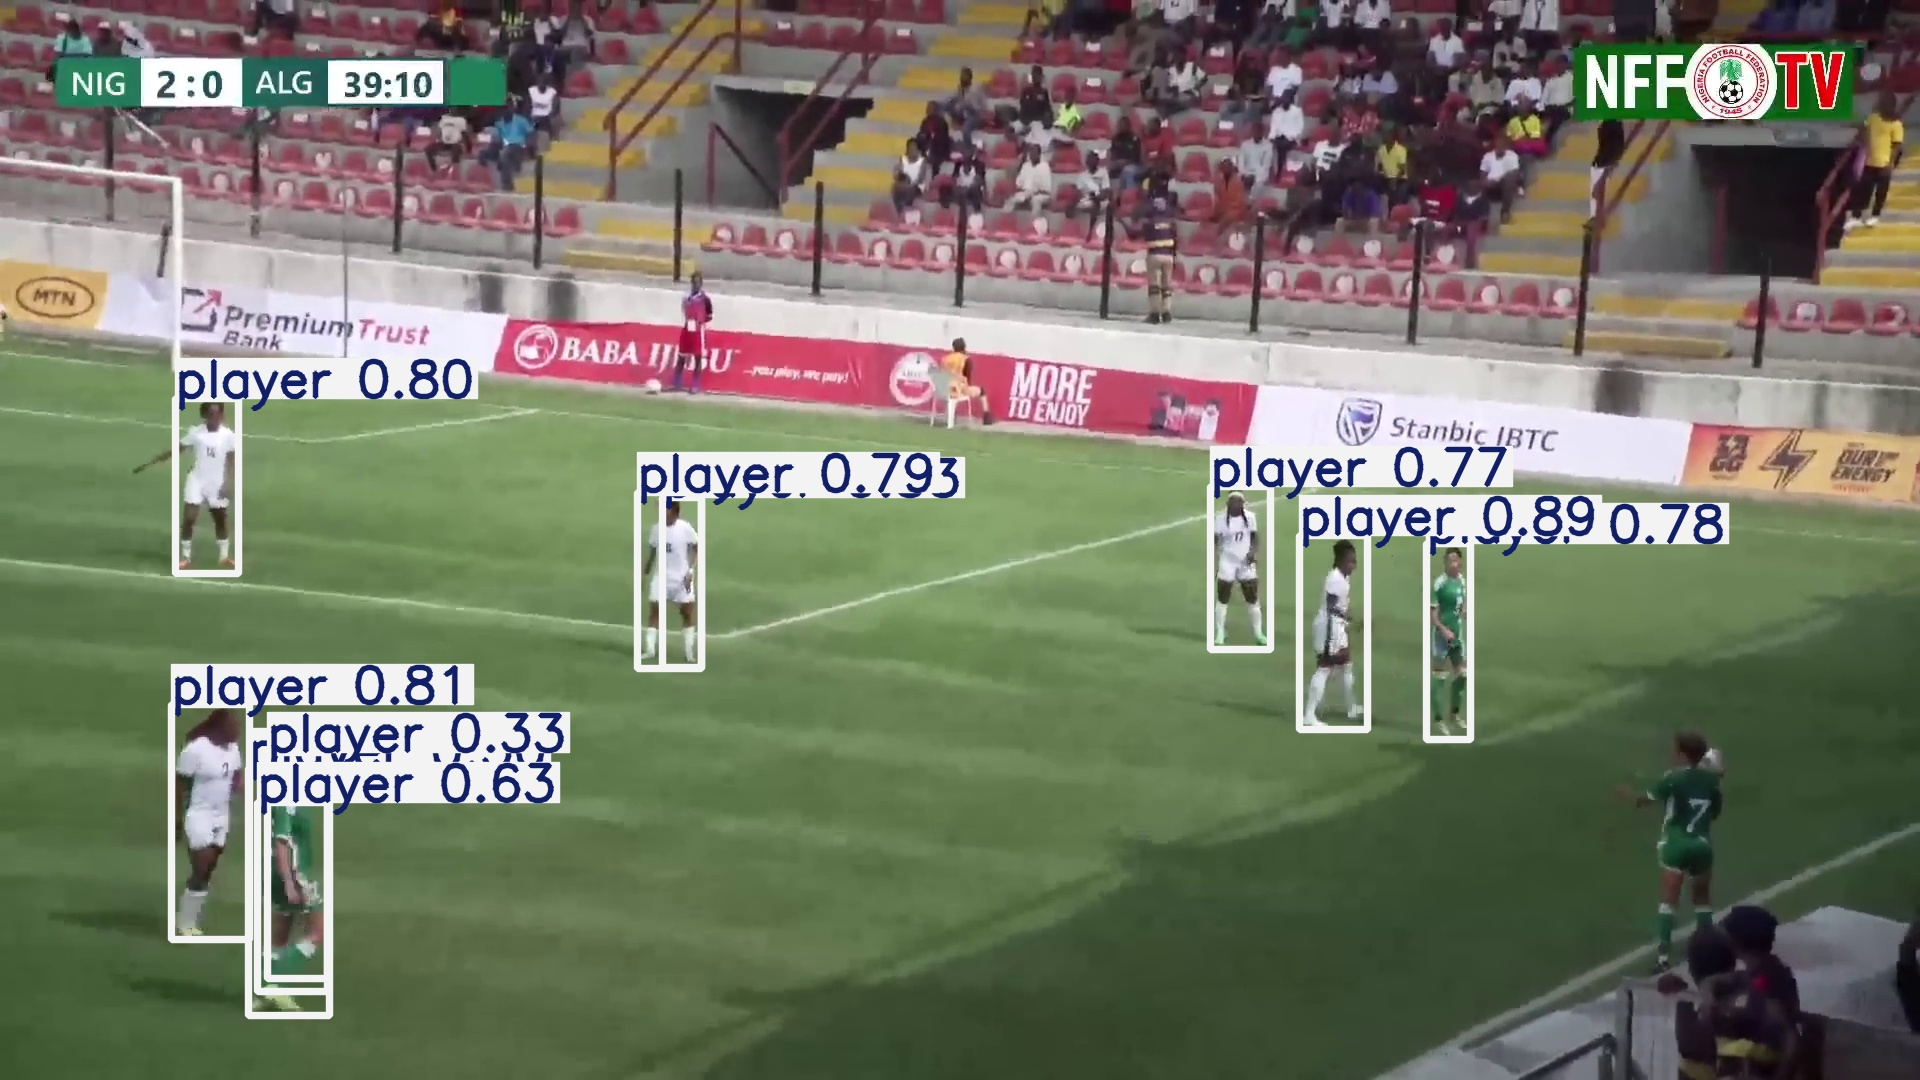

In [ ]:
from PIL import Image
import IPython.display as display

# Replace with real frame name from output above
frame_id = 'frame_166200'
img_path = f'runs/video_preds/{frame_id}.jpg'

display.display(Image.open(img_path))


In [ ]:
import os
import json

# Set the path to your label files
label_folder = "runs/video_preds/labels"
output_json = "video_predictions.json"

# Optional: Class names (adjust as needed)
class_names = ["player"]  # Add more if your model has more classes

data = {}

# Loop through all label files
for file_name in os.listdir(label_folder):
    if file_name.endswith(".txt"):
        frame_id = file_name.replace(".txt", "")
        frame_path = f"processed_frames/{frame_id}.jpg"

        with open(os.path.join(label_folder, file_name), "r") as file:
            annotations = file.readlines()

        objects = []
        for line in annotations:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:5])
                conf = float(parts[5]) if len(parts) == 6 else None

                obj = {
                    "class_id": class_id,
                    "class_name": class_names[class_id] if class_id < len(class_names) else f"class_{class_id}",
                    "bbox": {
                        "x_center": x_center,
                        "y_center": y_center,
                        "width": width,
                        "height": height
                    }
                }

                if conf is not None:
                    obj["confidence"] = conf

                objects.append(obj)

        data[frame_id] = {
            "frame_path": frame_path,
            "objects": objects
        }

# Save as JSON
with open(output_json, "w") as json_file:
    json.dump(data, json_file, indent=4)

print(f"Saved predictions to {output_json}")


Saved predictions to video_predictions.json


In [ ]:
import json

# Load predictions
with open("video_predictions.json", "r") as f:
    predictions = json.load(f)

# Preview the structure (first 2 frames)
for i, (frame_id, frame_data) in enumerate(predictions.items()):
    print(f"{frame_id}: {frame_data}")
    if i == 1:
        break


frame_204600: {'frame_path': 'processed_frames/frame_204600.jpg', 'objects': [{'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.473283, 'y_center': 0.478328, 'width': 0.0234982, 'height': 0.0972371}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.53715, 'y_center': 0.384776, 'width': 0.022416, 'height': 0.0872074}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.519685, 'y_center': 0.709712, 'width': 0.032039, 'height': 0.16536}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.766844, 'y_center': 0.45051, 'width': 0.0355066, 'height': 0.111794}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.632819, 'y_center': 0.517478, 'width': 0.0241346, 'height': 0.116166}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.582627, 'y_center': 0.341741, 'width': 0.0149008, 'height': 0.0707427}}, {'class_id': 2, 'class_name': 'class_2', 'bbox': {'x_center': 0.491777, 'y_center': 0.43802, 'width': 0.0222

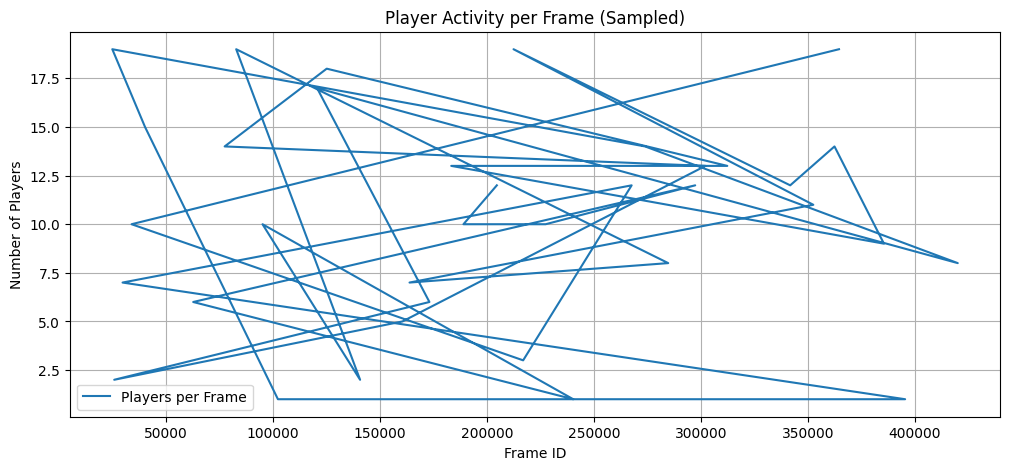

In [ ]:
import matplotlib.pyplot as plt

frame_ids = []
player_counts = []
avg_confidences = []

for frame_id, frame_data in predictions.items():
    objects = frame_data["objects"]

    if not objects:
        continue

    frame_number = int(frame_id.replace("frame_", ""))  # <- fix here
    numeric_id = int(frame_id.split('_')[-1])
    frame_ids.append(numeric_id)
    player_counts.append(len(objects))
    if conf is not None:
      obj["confidence"] = float(conf)  # <-- ADD THIS LINE



# Plot number of players detected per frame
step = 30 # Change to 20 or 30 if still cluttered
plt.figure(figsize=(12, 5))
plt.plot(frame_ids[::step], player_counts[::step], label="Players per Frame")
plt.xlabel("Frame ID")
plt.ylabel("Number of Players")
plt.title("Player Activity per Frame (Sampled)")
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
!git clone https://github.com/mikel-brostrom/Yolov5_DeepSort_PyTorch.git
%cd /content/Yolov5_DeepSort_PyTorch/Yolov5_DeepSort_PyTorch



Cloning into 'Yolov5_DeepSort_PyTorch'...
remote: Enumerating objects: 18383, done.
remote: Counting objects: 100% (546/546), done.
remote: Compressing objects: 100% (266/266), done.
remote: Total 18383 (delta 407), reused 285 (delta 280), pack-reused 17837 (from 2)
Receiving objects: 100% (18383/18383), 128.63 MiB | 28.85 MiB/s, done.
Resolving deltas: 100% (11828/11828), done.
[Errno 2] No such file or directory: '/content/Yolov5_DeepSort_PyTorch/Yolov5_DeepSort_PyTorch'
/content


In [ ]:
%cd /content/Yolov5_DeepSort_Pytorch



[Errno 2] No such file or directory: '/content/Yolov5_DeepSort_Pytorch'
/content


In [ ]:
!pip install -q torch torchvision torchaudio
!pip install -q filterpy scikit-learn lap cython matplotlib opencv-python-headless


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.5 MB/s eta 0:00:00


In [ ]:
!pip install deep_sort_realtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
import cv2
import os

# Load your trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/colab/best_backup.pt')

# Initialize DeepSORT
tracker = DeepSort(max_age=30)


In [ ]:
tracked_results = []  # To store results for export

input_dir = '/content/processed_frames'  # Your processed frames folder
frame_files = sorted(os.listdir(input_dir))

for frame_id, frame_name in enumerate(frame_files):
    frame_path = os.path.join(input_dir, frame_name)
    frame = cv2.imread(frame_path)

    results = model.predict(source=frame, conf=0.4, iou=0.5, verbose=False)[0]
    detections = []

    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        conf = box.conf[0].item()
        cls_id = int(box.cls[0].item())
        detections.append(([x1, y1, x2 - x1, y2 - y1], conf, cls_id))

    tracks = tracker.update_tracks(detections, frame=frame)

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        ltrb = track.to_ltrb()
        tracked_results.append({
            'frame_id': frame_id,
            'track_id': track_id,
            'x1': int(ltrb[0]),
            'y1': int(ltrb[1]),
            'x2': int(ltrb[2]),
            'y2': int(ltrb[3])
        })


In [ ]:
import pandas as pd

df = pd.DataFrame(tracked_results)
df.to_csv('tracked_players.csv', index=False)
print("Tracking complete. Saved to 'tracked_players.csv'")


Tracking complete. Saved to 'tracked_players.csv'


In [ ]:
import pandas as pd

df = pd.read_csv('tracked_players.csv')
print(df.columns)
df.head()


Index(['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2'], dtype='object')


frame_id  track_id    x1   y1    x2   y2
0        46       146  1528  530  1593  723
1        47       146  1522  446  1584  630
2        48       146  1520  390  1578  558
3        49       146  1519  334  1571  486
4        50       146  1518  277  1564  413

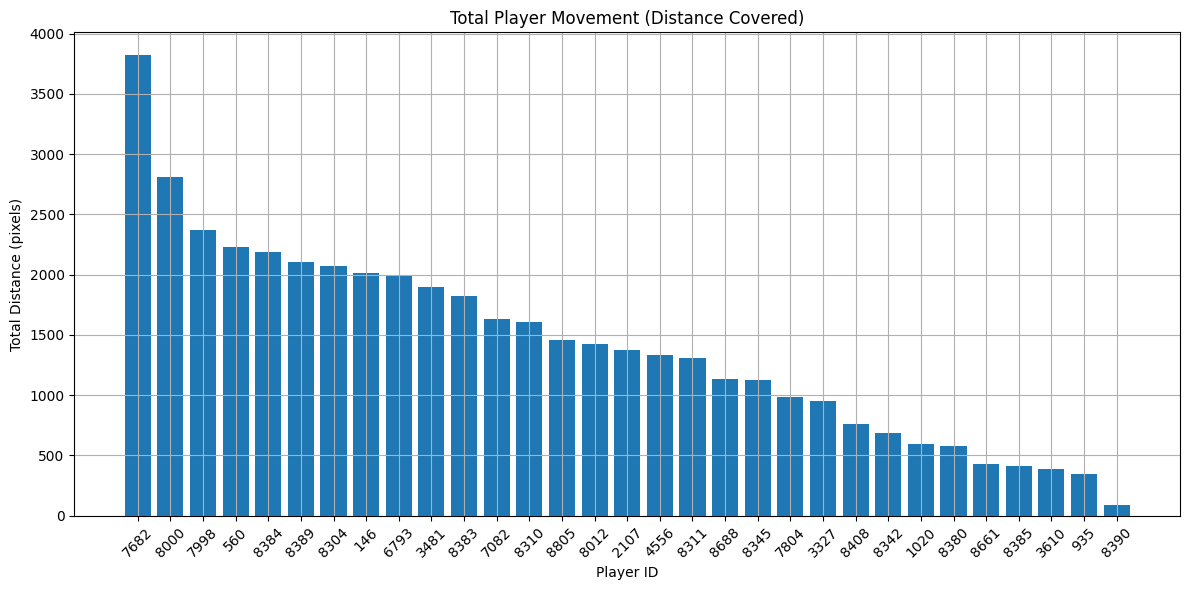

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load tracked data
df = pd.read_csv('tracked_players.csv')

# Convert to numeric (if not already)
cols = ['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute center point of each bounding box
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort by track_id and frame
df = df.sort_values(by=['track_id', 'frame_id'])

# Compute movement distance per player
distances = []
for player_id, group in df.groupby('track_id'):
    group = group.sort_values('frame_id')
    dx = group['cx'].diff().fillna(0)
    dy = group['cy'].diff().fillna(0)
    dist = np.sqrt(dx**2 + dy**2)
    total_distance = dist.sum()
    distances.append((player_id, total_distance))

# Convert to DataFrame
distance_df = pd.DataFrame(distances, columns=['Player ID', 'Distance Covered'])

# Sort by distance covered
distance_df = distance_df.sort_values(by='Distance Covered', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(distance_df['Player ID'].astype(str), distance_df['Distance Covered'])
plt.xlabel('Player ID')
plt.ylabel('Total Distance (pixels)')
plt.title('Total Player Movement (Distance Covered)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


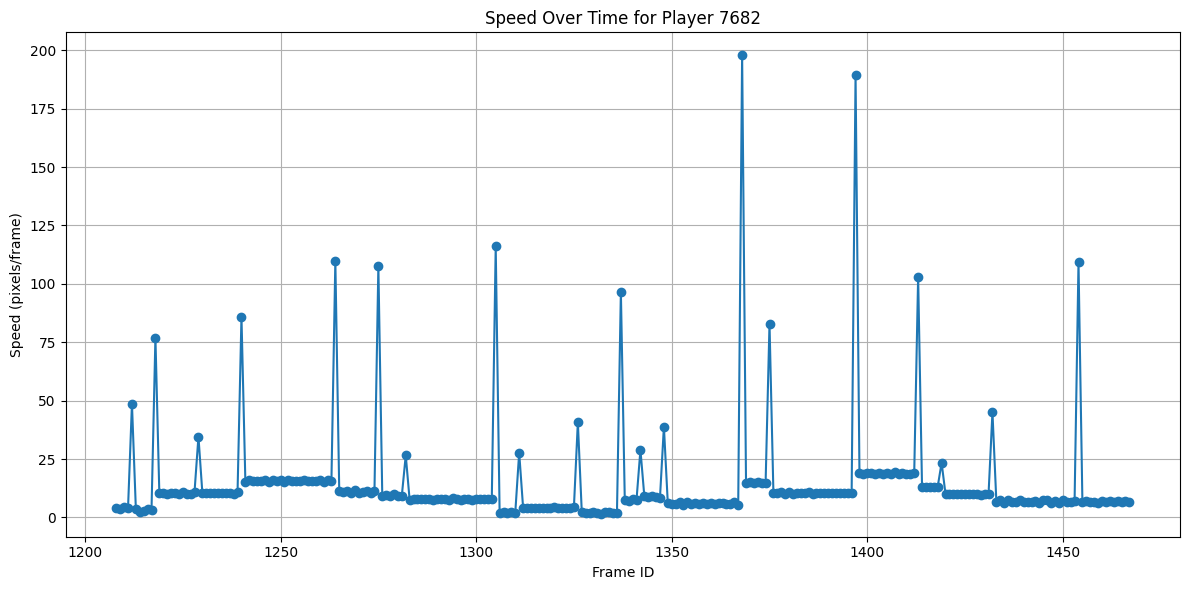

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load tracking data
df = pd.read_csv('tracked_players.csv')

# Compute center coordinates
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort by player (track_id) and frame_id
df = df.sort_values(by=['track_id', 'frame_id'])

# Compute distance between frames for each player
df['dx'] = df.groupby('track_id')['cx'].diff()
df['dy'] = df.groupby('track_id')['cy'].diff()
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)

# Plot speed (distance per frame) for one player (e.g., track_id = 146)
player_id = df['track_id'].value_counts().idxmax()  # top most frequent player
player_df = df[df['track_id'] == player_id]

plt.figure(figsize=(12, 6))
plt.plot(player_df['frame_id'], player_df['distance'], marker='o')
plt.title(f"Speed Over Time for Player {player_id}")
plt.xlabel("Frame ID")
plt.ylabel("Speed (pixels/frame)")
plt.grid(True)
plt.tight_layout()
plt.show()


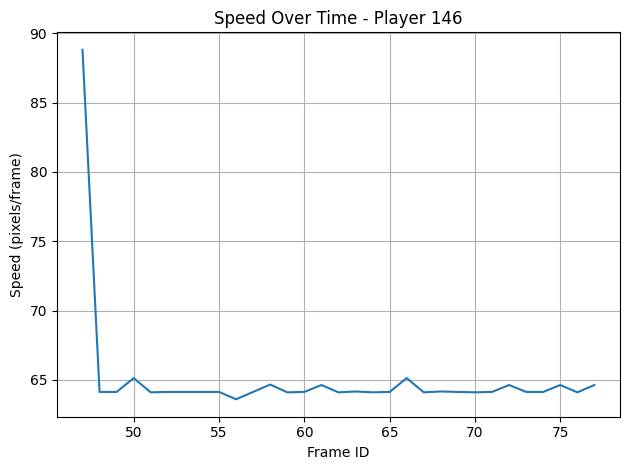

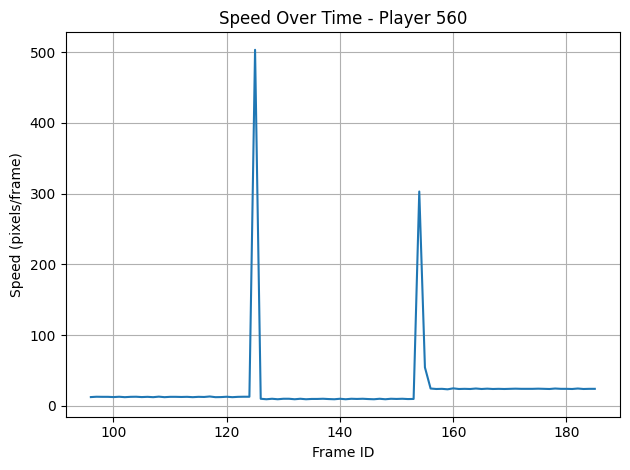

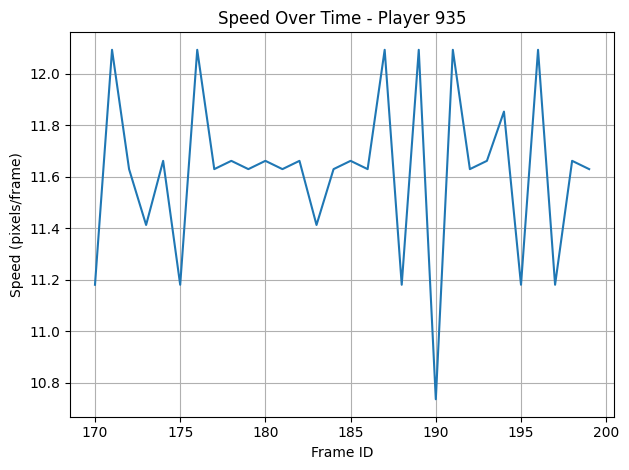

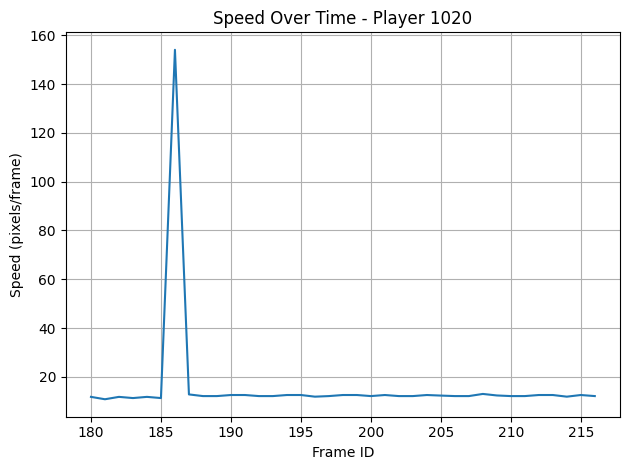

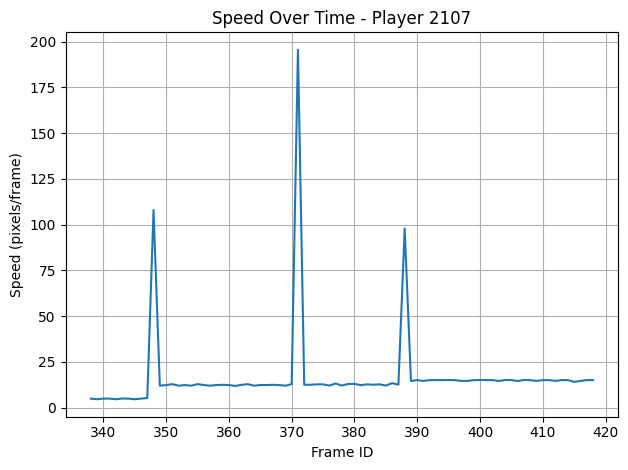

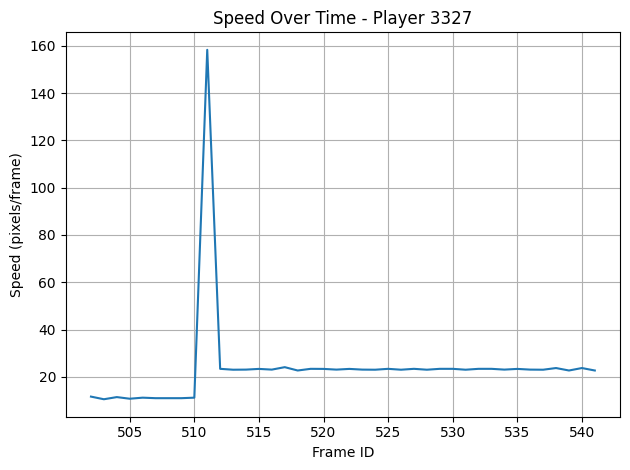

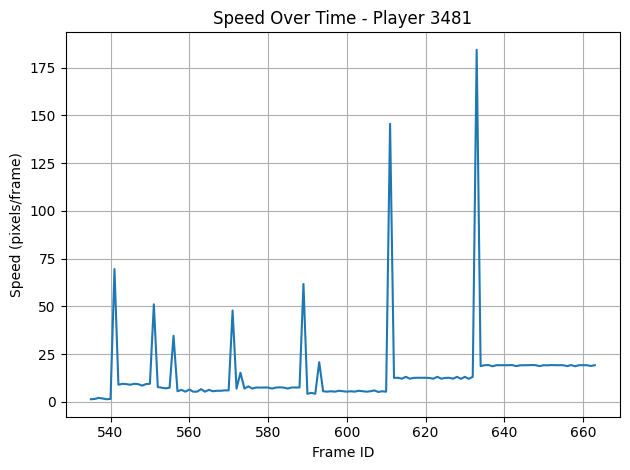

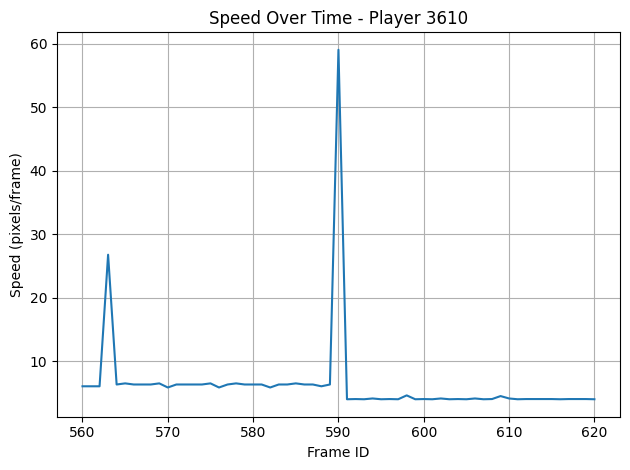

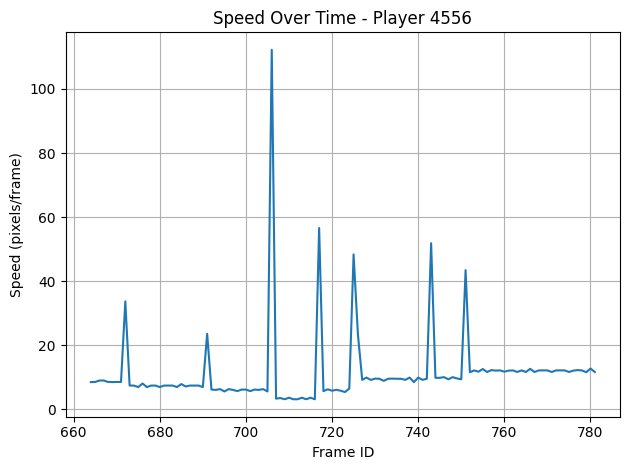

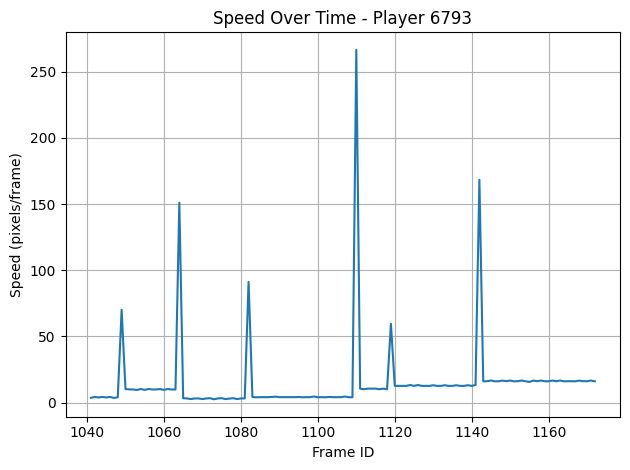

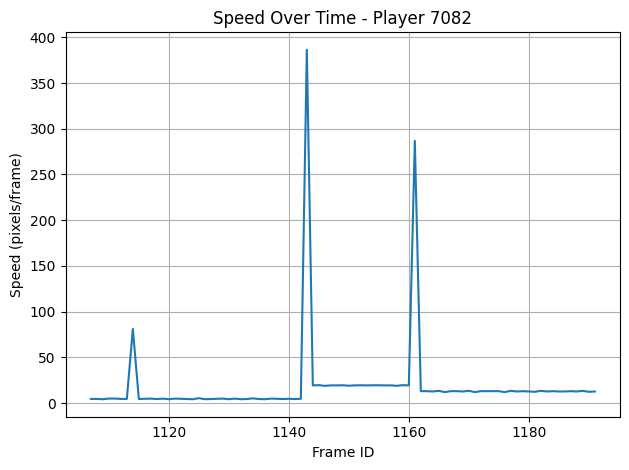

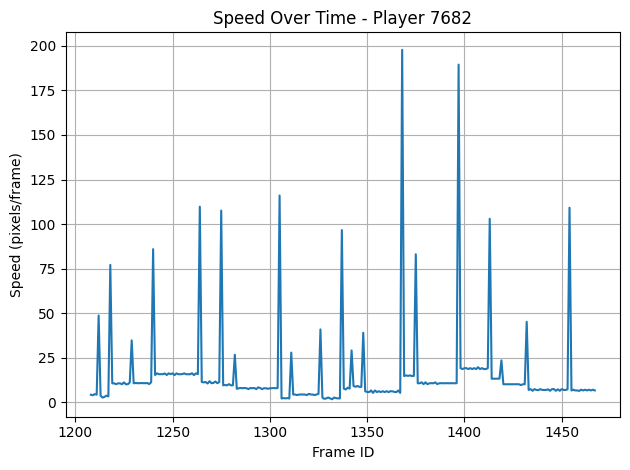

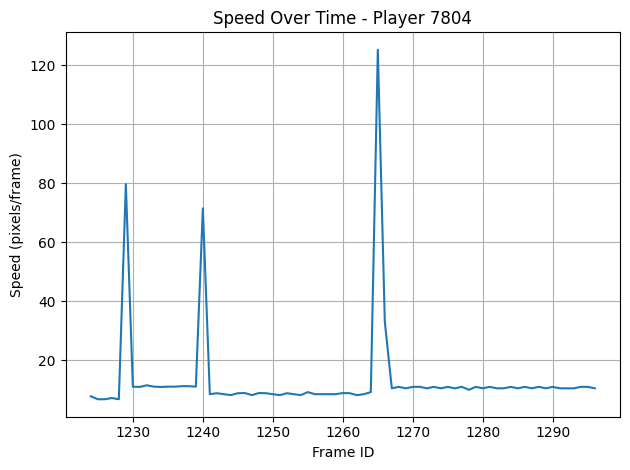

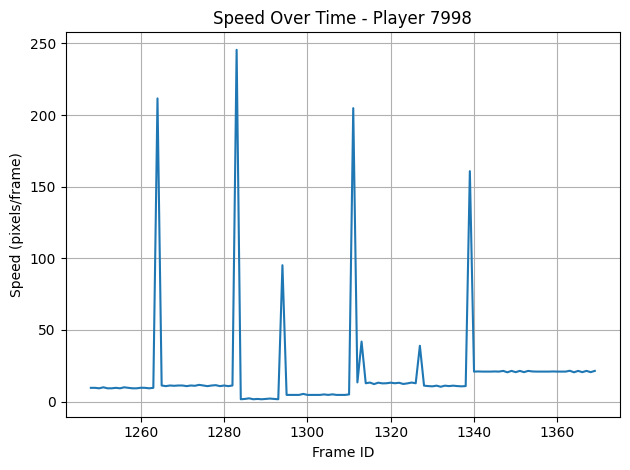

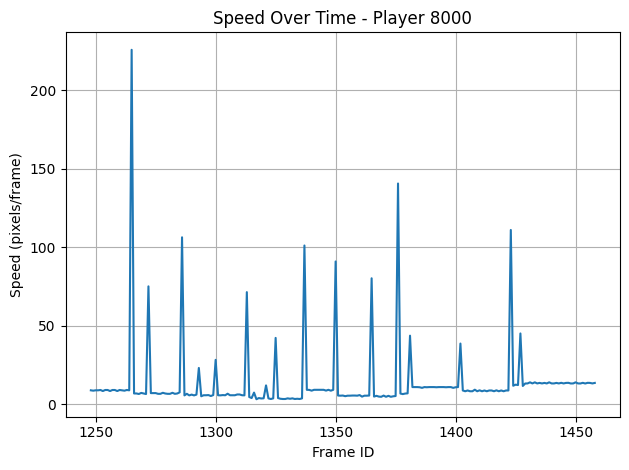

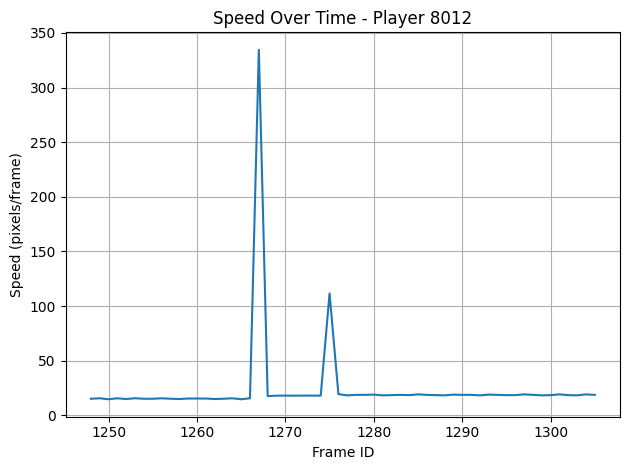

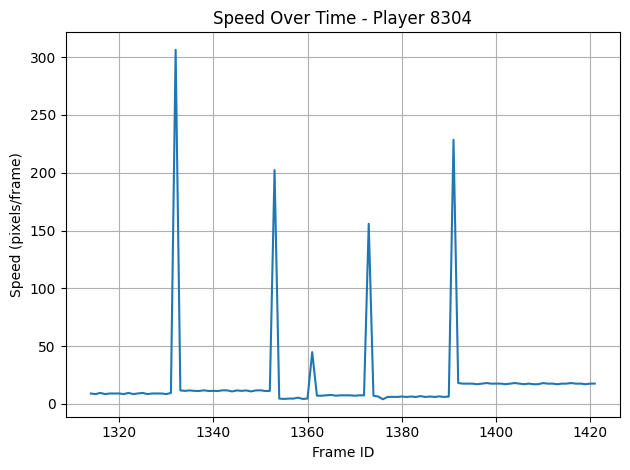

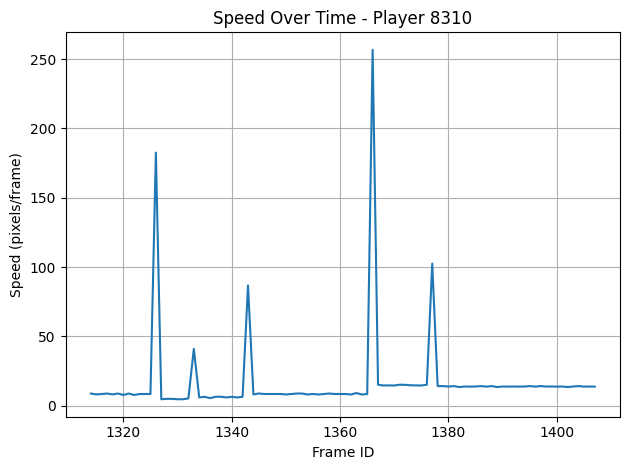

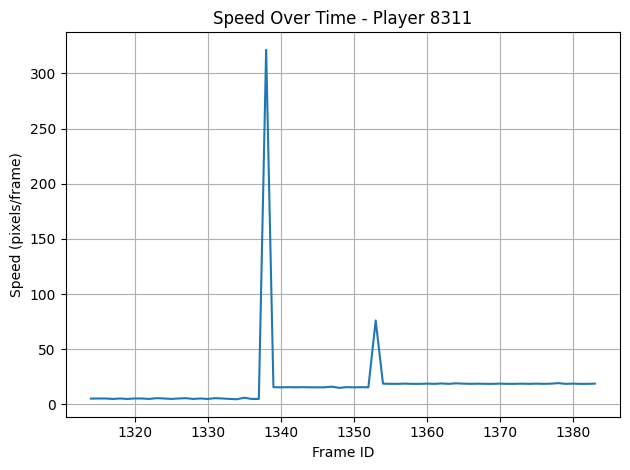

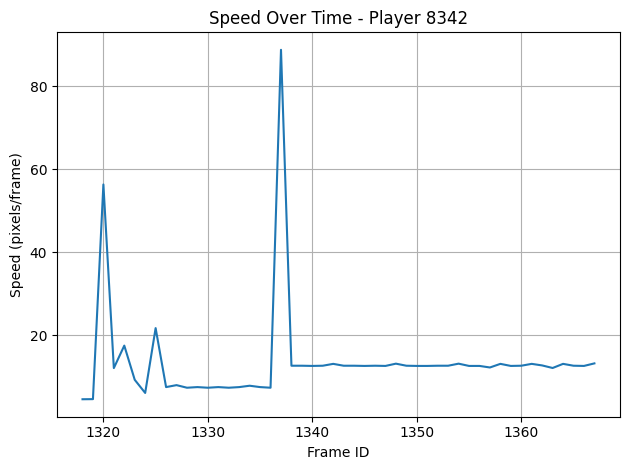

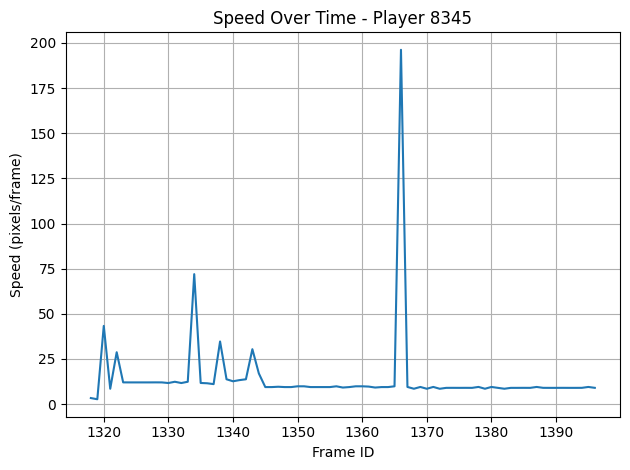

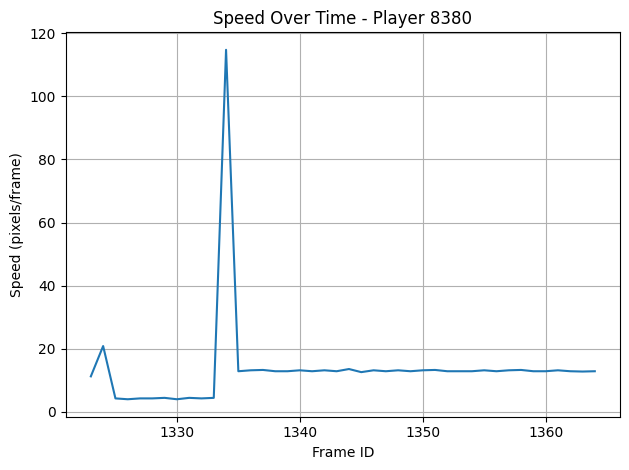

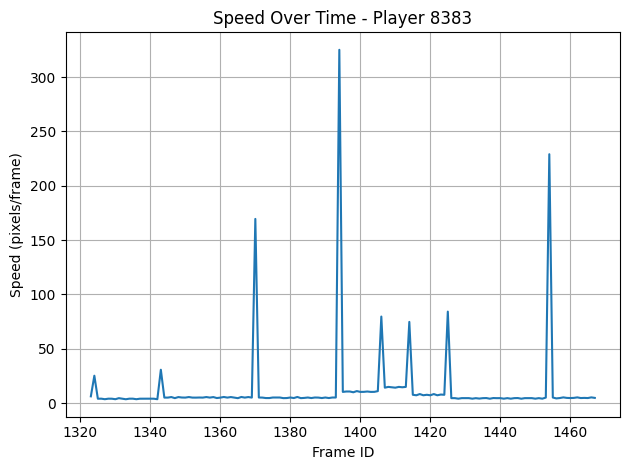

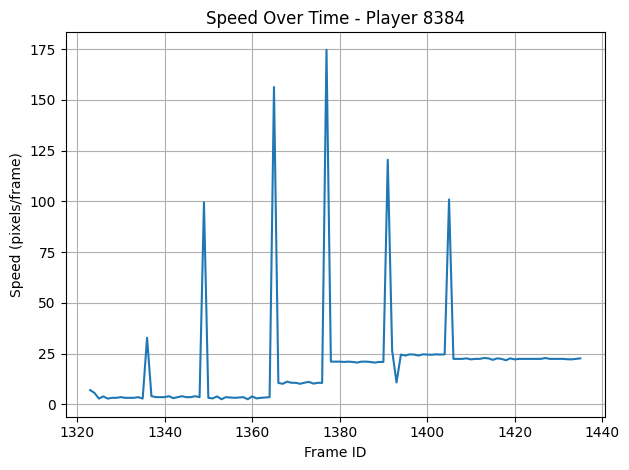

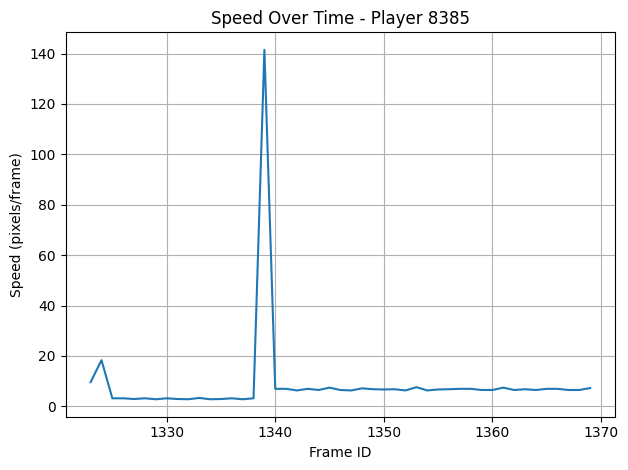

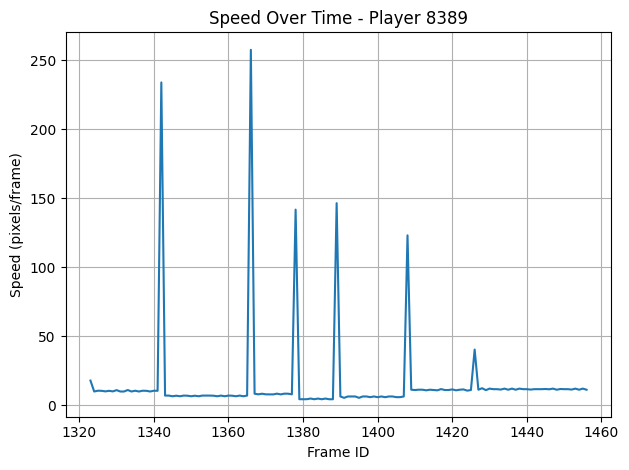

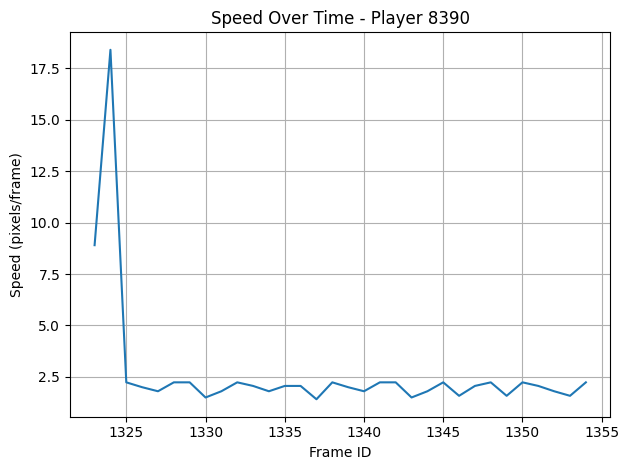

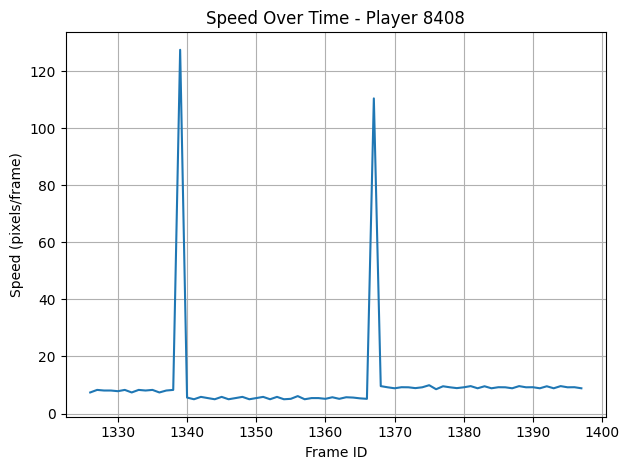

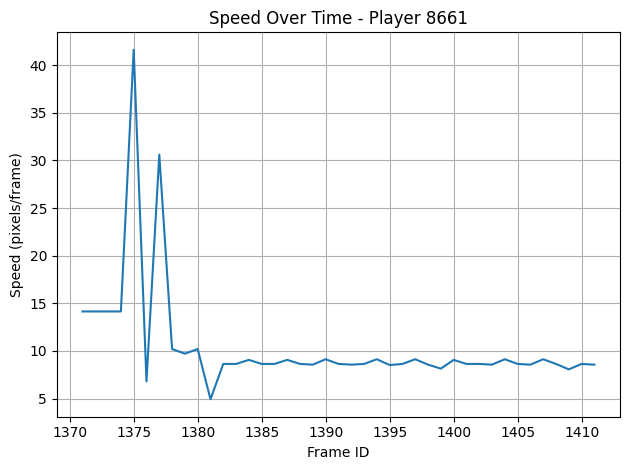

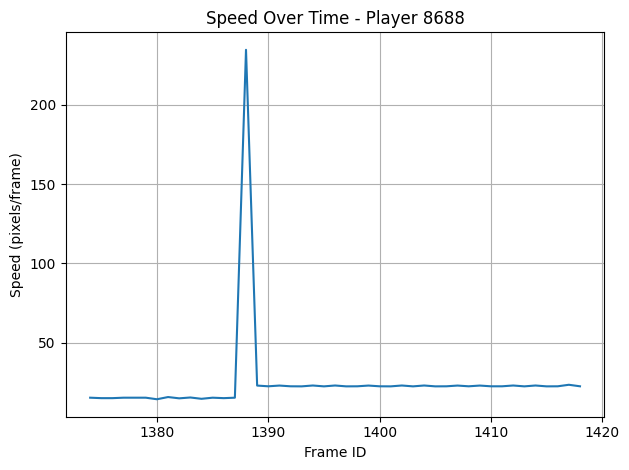

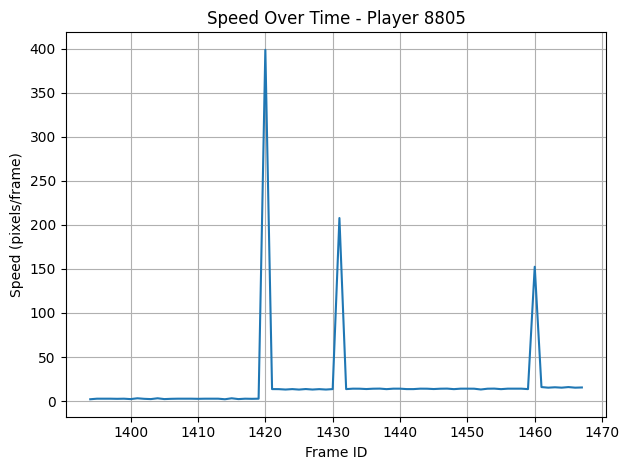

In [ ]:
unique_players = df['track_id'].unique()

for player_id in unique_players:
    player_df = df[df['track_id'] == player_id].copy()
    # Calculate speed
    player_df['center_x'] = (player_df['x1'] + player_df['x2']) / 2
    player_df['center_y'] = (player_df['y1'] + player_df['y2']) / 2
    player_df['dx'] = player_df['center_x'].diff()
    player_df['dy'] = player_df['center_y'].diff()
    player_df['distance'] = np.sqrt(player_df['dx']**2 + player_df['dy']**2)

    plt.plot(player_df['frame_id'], player_df['distance'], label=f'Player {player_id}')
    plt.title(f'Speed Over Time - Player {player_id}')
    plt.xlabel('Frame ID')
    plt.ylabel('Speed (pixels/frame)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
df['center_x'] = (df['x1'] + df['x2']) / 2
df['center_y'] = (df['y1'] + df['y2']) / 2

df['dx'] = df.groupby('track_id')['center_x'].diff()
df['dy'] = df.groupby('track_id')['center_y'].diff()

df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)

# Example summary:
avg_speed_per_player = df.groupby('track_id')['distance'].mean().sort_values(ascending=False)
peak_speed_per_player = df.groupby('track_id')['distance'].max().sort_values(ascending=False)


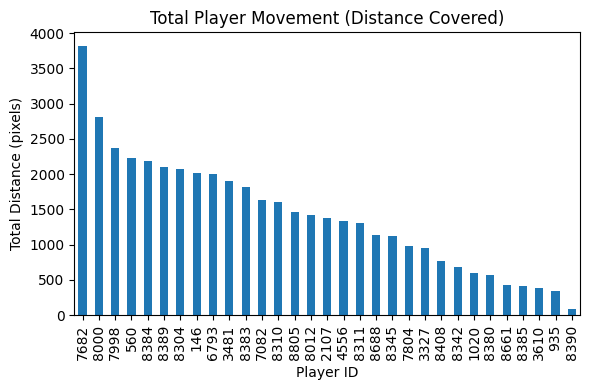

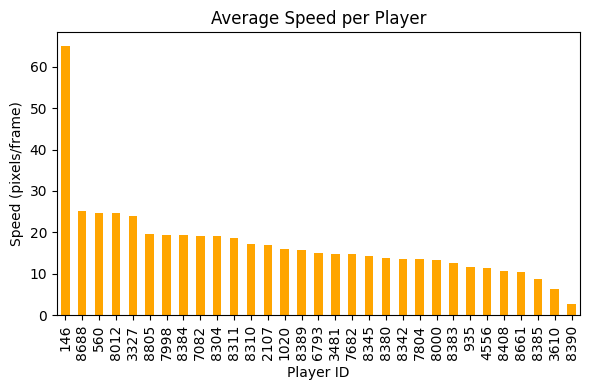

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the tracking data
df = pd.read_csv('tracked_players.csv')

# Convert columns to numeric (in case they aren't)
cols = ['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute center point of each bounding box (player position)
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort by track_id and frame_id for correct frame-by-frame comparison
df = df.sort_values(by=['track_id', 'frame_id'])

# Compute distance and speed per frame
df['dx'] = df.groupby('track_id')['cx'].diff()
df['dy'] = df.groupby('track_id')['cy'].diff()
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)
df['speed'] = df['distance']  # Assuming 1 frame = 1 time unit (e.g., 1/30 sec)

# Total Distance Covered (per player)
total_distance = df.groupby('track_id')['distance'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
total_distance.plot(kind='bar')
plt.title('Total Player Movement (Distance Covered)')
plt.xlabel('Player ID')
plt.ylabel('Total Distance (pixels)')
plt.tight_layout()
plt.show()

# Average Speed per Player (Workload Intensity)
avg_speed = df.groupby('track_id')['speed'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
avg_speed.plot(kind='bar', color='orange')
plt.title('Average Speed per Player')
plt.xlabel('Player ID')
plt.ylabel('Speed (pixels/frame)')
plt.tight_layout()
plt.show()

# Optional: Save final data
df.to_csv('player_physical_metrics.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load tracked data
df = pd.read_csv('tracked_players.csv')

# Convert to numeric in case any column is string type
cols = ['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute center point of each bounding box
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort data by track and frame to keep motion order
df = df.sort_values(by=['track_id', 'frame_id'])

# Compute distance and speed per frame
df['dx'] = df.groupby('track_id')['cx'].diff()
df['dy'] = df.groupby('track_id')['cy'].diff()
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)
df['speed'] = df['distance']  # assuming 1 frame = 1 time unit

# Group by player (track_id) to calculate total distance, avg speed, and workload
summary = df.groupby('track_id').agg(
    total_distance=('distance', 'sum'),
    average_speed=('speed', 'mean'),
    workload=('frame_id', 'count')
).reset_index()

# Optional: Save results
summary.to_csv('player_physical_metrics.csv', index=False)

# Plot total distance
plt.figure(figsize=(14, 5))
summary.sort_values('total_distance', ascending=False, inplace=True)
plt.bar(summary['track_id'].astype(str), summary['total_distance'])
plt.title('Total Player Movement (Distance Covered)')
plt.xlabel('Player ID')
plt.ylabel('Total Distance (pixels)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average speed
plt.figure(figsize=(14, 5))
summary.sort_values('average_speed', ascending=False, inplace=True)
plt.bar(summary['track_id'].astype(str), summary['average_speed'], color='orange')
plt.title('Average Speed per Player')
plt.xlabel('Player ID')
plt.ylabel('Speed (pixels/frame)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot workload
plt.figure(figsize=(14, 5))
summary.sort_values('workload', ascending=False, inplace=True)
plt.bar(summary['track_id'].astype(str), summary['workload'], color='green')
plt.title('Workload per Player (Frame Count)')
plt.xlabel('Player ID')
plt.ylabel('Frame Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'tracked_players.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('tracked_players.csv')

# Convert to numeric (in case any column is string type)
cols = ['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute center of bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort for proper frame-wise analysis
df.sort_values(by=['track_id', 'frame_id'], inplace=True)

# Compute distance moved between frames
df['dx'] = df.groupby('track_id')['cx'].diff()
df['dy'] = df.groupby('track_id')['cy'].diff()
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)

# Replace NaNs with 0
df['distance'].fillna(0, inplace=True)

# Compute speed (distance per frame)
df['speed'] = df['distance']  # Assuming 1 frame = 1 unit time

# Compute metrics per player
metrics = df.groupby('track_id').agg({
    'distance': 'sum',
    'speed': 'mean',
    'frame_id': 'count'
}).rename(columns={'distance': 'total_distance', 'speed': 'avg_speed', 'frame_id': 'workload'}).reset_index()

# Normalize for intensity score (0–100 scale)
metrics['norm_distance'] = (metrics['total_distance'] - metrics['total_distance'].min()) / (metrics['total_distance'].max() - metrics['total_distance'].min())
metrics['norm_speed'] = (metrics['avg_speed'] - metrics['avg_speed'].min()) / (metrics['avg_speed'].max() - metrics['avg_speed'].min())
metrics['intensity'] = 0.5 * (metrics['norm_distance'] + metrics['norm_speed']) * 100

# Save to CSV (optional)
metrics.to_csv('player_physical_metrics.csv', index=False)


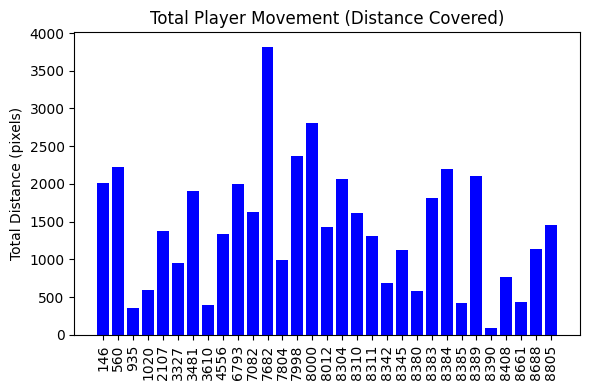

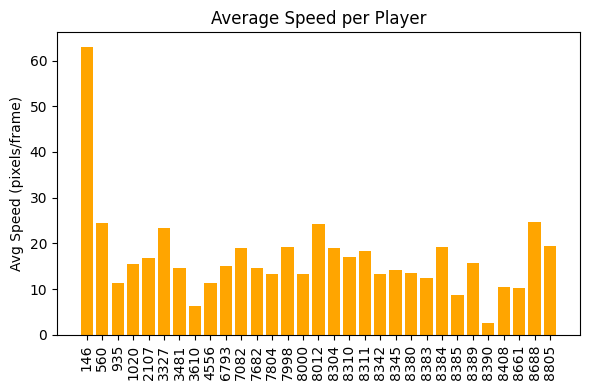

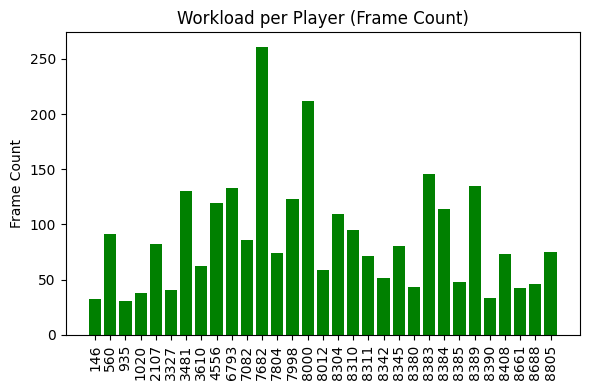

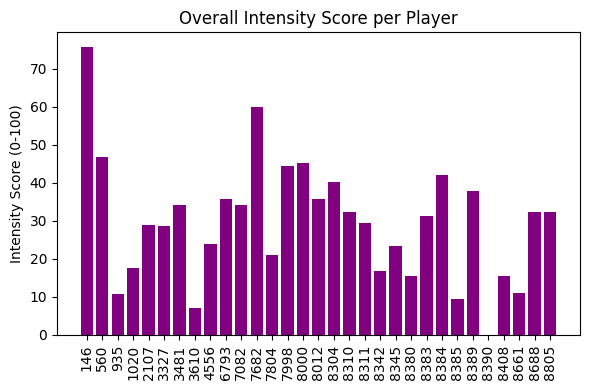

In [ ]:
# Distance Covered
plt.figure(figsize=(6, 4))
plt.bar(metrics['track_id'].astype(str), metrics['total_distance'], color='blue')
plt.xticks(rotation=90)
plt.ylabel("Total Distance (pixels)")
plt.title("Total Player Movement (Distance Covered)")
plt.tight_layout()
plt.show()

# Average Speed
plt.figure(figsize=(6, 4))
plt.bar(metrics['track_id'].astype(str), metrics['avg_speed'], color='orange')
plt.xticks(rotation=90)
plt.ylabel("Avg Speed (pixels/frame)")
plt.title("Average Speed per Player")
plt.tight_layout()
plt.show()

# Workload (frames seen)
plt.figure(figsize=(6, 4))
plt.bar(metrics['track_id'].astype(str), metrics['workload'], color='green')
plt.xticks(rotation=90)
plt.ylabel("Frame Count")
plt.title("Workload per Player (Frame Count)")
plt.tight_layout()
plt.show()

# Intensity Score
plt.figure(figsize=(6, 4))
plt.bar(metrics['track_id'].astype(str), metrics['intensity'], color='purple')
plt.xticks(rotation=90)
plt.ylabel("Intensity Score (0-100)")
plt.title("Overall Intensity Score per Player")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load player physical metrics
df = pd.read_csv('player_physical_metrics.csv')
df.head()


track_id  total_distance  avg_speed  workload  norm_distance  norm_speed  \
0       146     2016.420821  63.013151        32       0.517122    1.000000   
1       560     2230.532133  24.511342        91       0.574484    0.362570   
2       935      348.547122  11.243456        31       0.070290    0.142909   
3      1020      591.898544  15.576277        38       0.135485    0.214643   
4      2107     1371.684850  16.727864        82       0.344394    0.233708   

   intensity  
0  75.856117  
1  46.852712  
2  10.659953  
3  17.506388  
4  28.905115

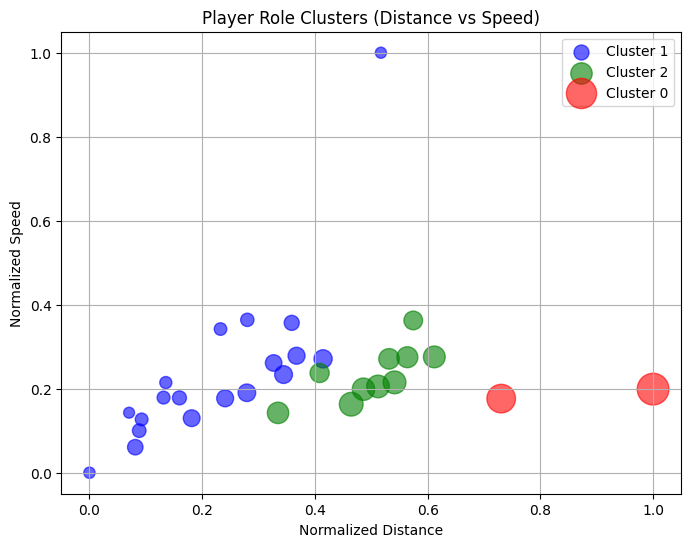

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features and normalize if not yet normalized
features = df[['norm_distance', 'norm_speed', 'workload']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

# Visualize clusters
colors = ['red', 'blue', 'green']
plt.figure(figsize=(8,6))
for cluster in df['cluster'].unique():
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset['norm_distance'], subset['norm_speed'],
                s=subset['workload']*2,
                color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Normalized Distance')
plt.ylabel('Normalized Speed')
plt.title('Player Role Clusters (Distance vs Speed)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df.to_csv('final_player_metrics.csv', index=False)


/tmp/ipython-input-51-818611422.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize='small', ncol=2)


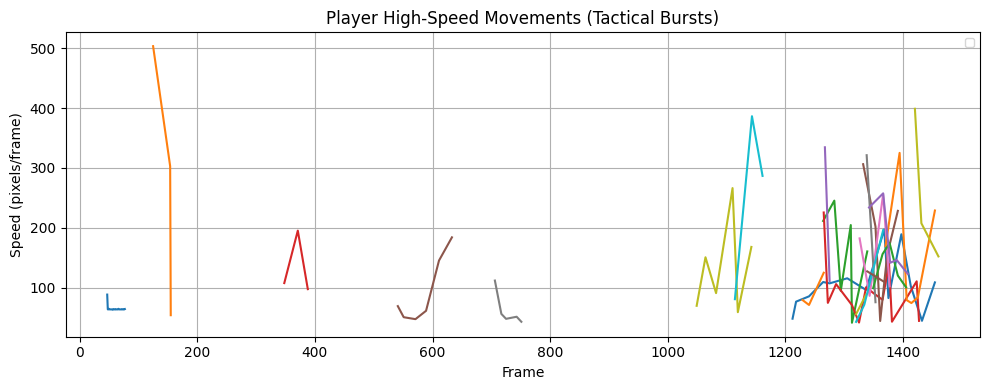

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the tracked players CSV
df = pd.read_csv("tracked_players.csv")

# Convert bounding box columns to numeric
cols = ['frame_id', 'track_id', 'x1', 'y1', 'x2', 'y2']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Compute center of bounding boxes
df['x'] = (df['x1'] + df['x2']) / 2
df['y'] = (df['y1'] + df['y2']) / 2

# Sort for frame-by-frame tracking
df = df.sort_values(['track_id', 'frame_id'])

# Compute differences between frames
df['dx'] = df.groupby('track_id')['x'].diff()
df['dy'] = df.groupby('track_id')['y'].diff()
df['speed'] = np.sqrt(df['dx']**2 + df['dy']**2).fillna(0)

# Define tactical bursts as speed above 95th percentile
speed_threshold = df['speed'].quantile(0.95)
burst_moments = df[df['speed'] > speed_threshold]

# Plot tactical bursts
plt.figure(figsize=(10, 4))
for tid in burst_moments['track_id'].unique():
    plt.plot(
        burst_moments[burst_moments['track_id'] == tid]['frame_id'],
        burst_moments[burst_moments['track_id'] == tid]['speed'],
       # label=f'Player {tid}'
    )

plt.title('Player High-Speed Movements (Tactical Bursts)')
plt.xlabel('Frame')
plt.ylabel('Speed (pixels/frame)')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


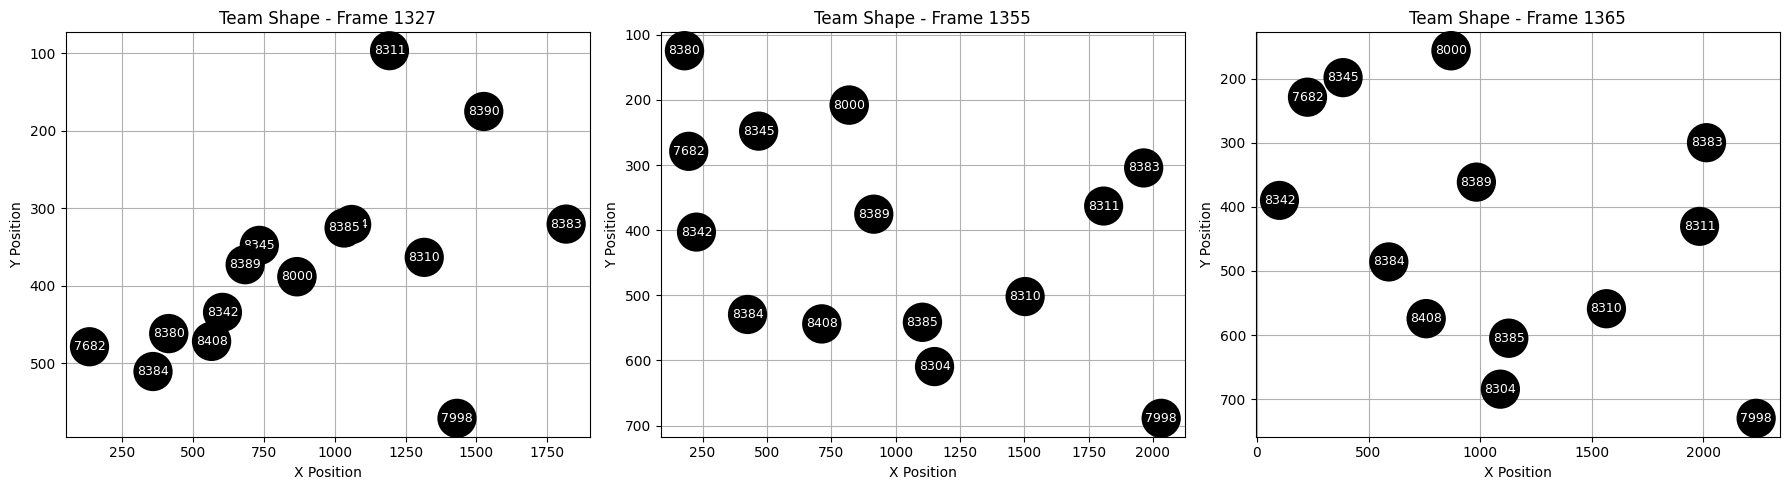

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the player tracking data
df = pd.read_csv("tracked_players.csv")

# Compute the center of the bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Get the top 3 unique frames with the most players
frame_counts = df['frame_id'].value_counts().sort_values(ascending=False)
unique_top_frames = frame_counts.drop_duplicates().head(3).index.tolist()

# Filter the data for those frames
shapes = df[df['frame_id'].isin(unique_top_frames)]

# Plot player positions in each frame
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, frame in enumerate(unique_top_frames):
    frame_data = shapes[shapes['frame_id'] == frame]
    axes[i].scatter(frame_data['cx'], frame_data['cy'], c='blue', s=100)

    # Add player ID labels inside the circles
    for _, row in frame_data.iterrows():
        axes[i].text(
            row['cx'], row['cy'], str(int(row['track_id'])),
            fontsize=9, ha='center', va='center', color='white',
            bbox=dict(facecolor='black', edgecolor='none', boxstyle='circle')
        )

    axes[i].invert_yaxis()
    axes[i].set_title(f'Team Shape - Frame {frame}')
    axes[i].set_xlabel("X Position")
    axes[i].set_ylabel("Y Position")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


/tmp/ipython-input-52-1853531120.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['marking_distance'] = df.groupby('frame_id').apply(compute_marking_distance).reset_index(level=0, drop=True)


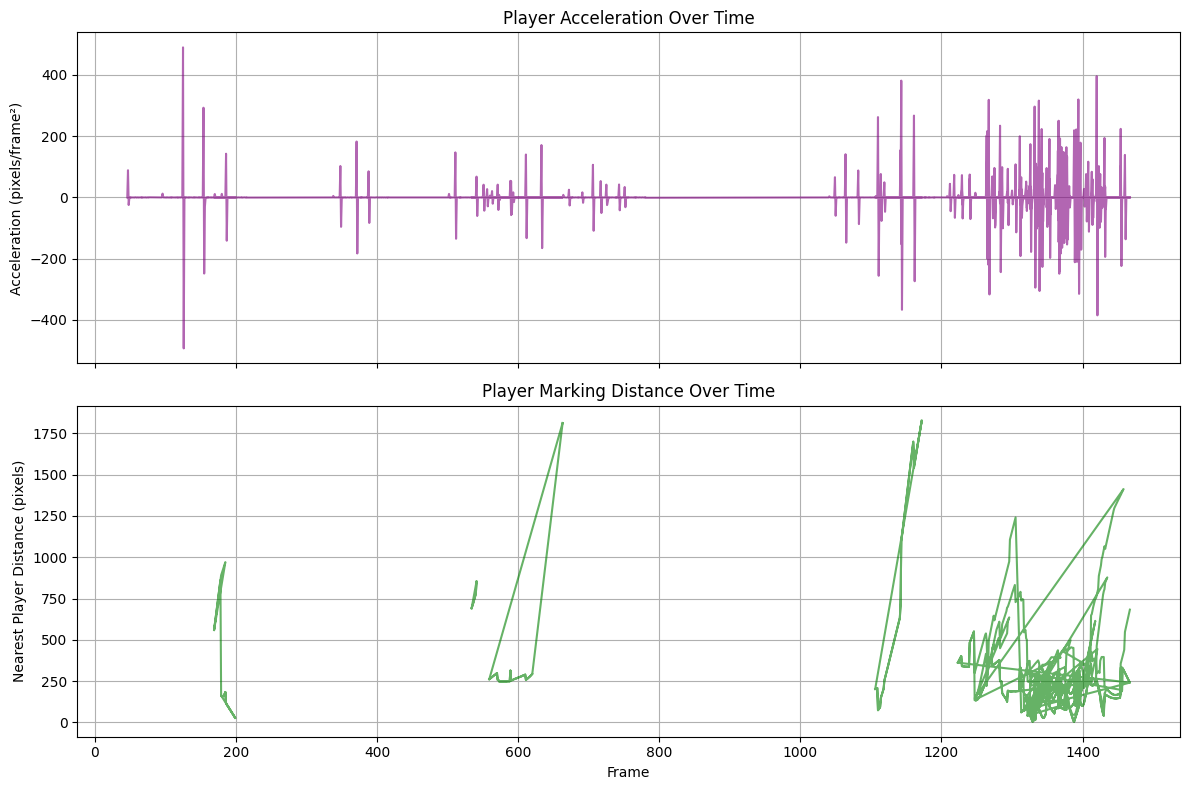

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the tracking data
df = pd.read_csv("tracked_players.csv")

# Calculate center positions from bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2

# Sort values by player and time
df = df.sort_values(by=['track_id', 'frame_id'])

# Compute displacement and speed
df['dx'] = df.groupby('track_id')['cx'].diff()
df['dy'] = df.groupby('track_id')['cy'].diff()
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2)
df['speed'] = df['distance'].fillna(0)

# Compute acceleration (change in speed over time)
df['acceleration'] = df.groupby('track_id')['speed'].diff().fillna(0)

# Compute marking distance (nearest player in the same frame)
def compute_marking_distance(group):
    coords = group[['cx', 'cy']].values
    if len(coords) < 2:
        return pd.Series([np.nan] * len(coords), index=group.index)
    distances = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=-1)
    np.fill_diagonal(distances, np.inf)
    return pd.Series(distances.min(axis=1), index=group.index)

df['marking_distance'] = df.groupby('frame_id').apply(compute_marking_distance).reset_index(level=0, drop=True)

# Plot the results
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot acceleration
axes[0].plot(df['frame_id'], df['acceleration'], color='purple', alpha=0.6)
axes[0].set_title("Player Acceleration Over Time")
axes[0].set_ylabel("Acceleration (pixels/frame²)")
axes[0].grid(True)

# Plot marking distance
axes[1].plot(df['frame_id'], df['marking_distance'], color='green', alpha=0.6)
axes[1].set_title("Player Marking Distance Over Time")
axes[1].set_xlabel("Frame")
axes[1].set_ylabel("Nearest Player Distance (pixels)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


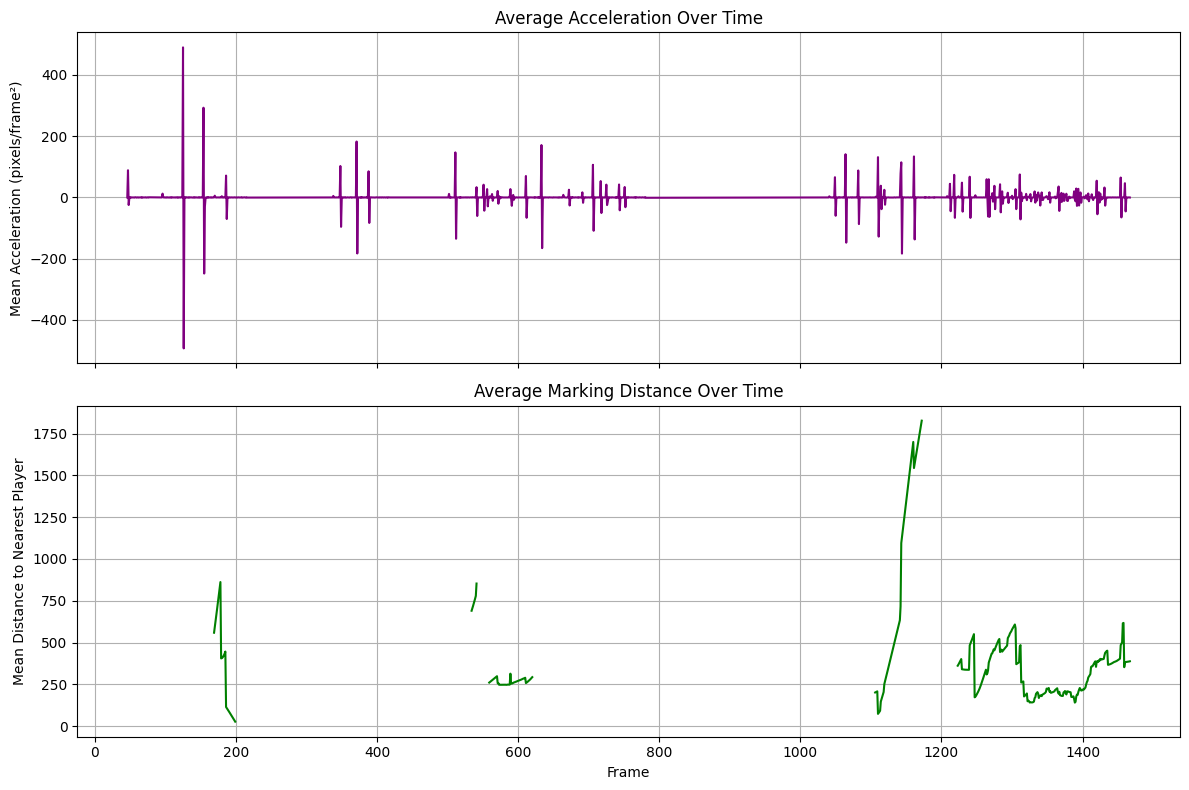

In [ ]:
# Aggregate by frame to reduce noise
mean_marking = df.groupby('frame_id')['marking_distance'].mean()
mean_acceleration = df.groupby('frame_id')['acceleration'].mean()

# Plot smoother version
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axes[0].plot(mean_acceleration.index, mean_acceleration, color='purple')
axes[0].set_title("Average Acceleration Over Time")
axes[0].set_ylabel("Mean Acceleration (pixels/frame²)")
axes[0].grid(True)

axes[1].plot(mean_marking.index, mean_marking, color='green')
axes[1].set_title("Average Marking Distance Over Time")
axes[1].set_xlabel("Frame")
axes[1].set_ylabel("Mean Distance to Nearest Player")
axes[1].grid(True)

plt.tight_layout()
plt.show()


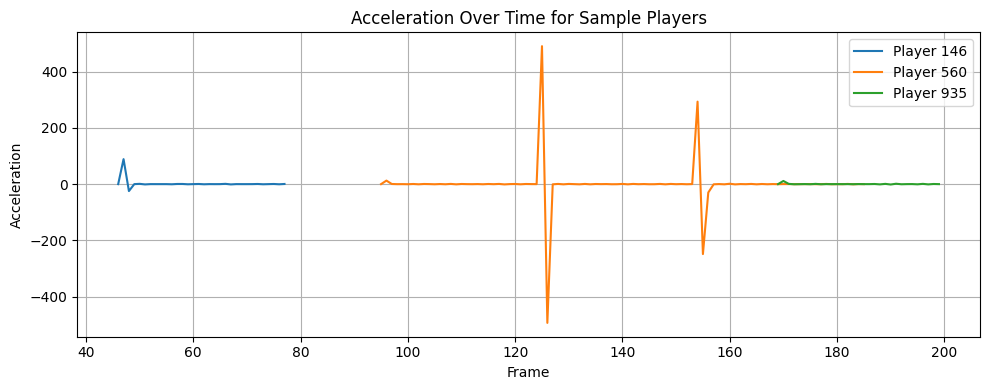

In [ ]:
# Visualize acceleration for 3 sample players
sample_ids = df['track_id'].dropna().unique()[:3]

plt.figure(figsize=(10, 4))
for tid in sample_ids:
    subset = df[df['track_id'] == tid]
    plt.plot(subset['frame_id'], subset['acceleration'], label=f'Player {tid}')

plt.title("Acceleration Over Time for Sample Players")
plt.xlabel("Frame")
plt.ylabel("Acceleration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
